<IPython.core.display.Javascript object>


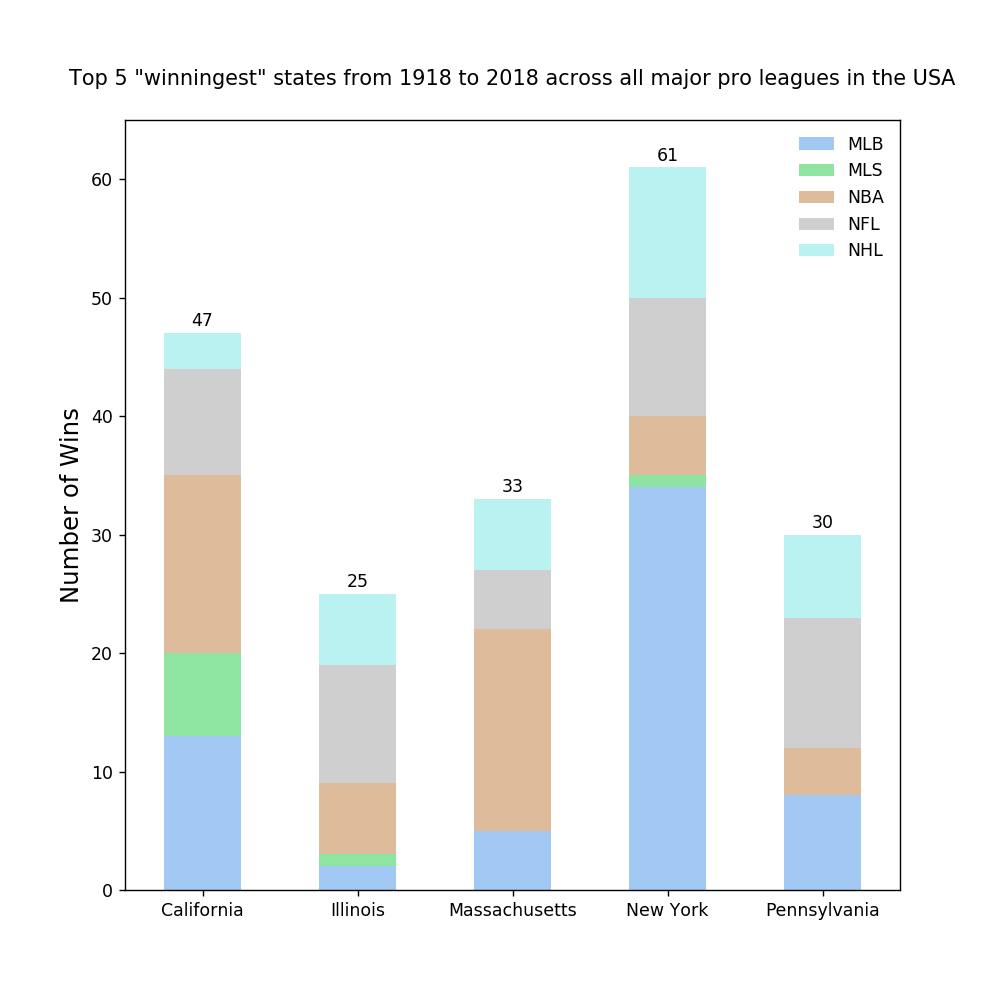

In [280]:

import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
%matplotlib notebook
import seaborn as sns
from matplotlib.colors import ListedColormap


# Reading the data into data frame
df = pd.read_csv('titles.csv',index_col = 'index')

# Only pro leagues
df = df[df['level'] == 'pro']

# 100 Years since 2018
df = df[df['year'] > 1917]

# Getting only the state name and not the city
df['winner_metro'] = df['winner_metro'].str.split(', ').str[1].str.lstrip()

# Ney York Greater area became NaN because of above, so filling it back with NY
df['winner_metro'] = df['winner_metro'].fillna('NY')

# Removing CFL as we are focusing only on top 5 major US leagues 
df = df[~(df['sport'] == 'CFL')]

# Data of interest
subset = df[['year','winner_metro','sport']]

# Counting per state per sport titles
interest = subset.groupby(['winner_metro','sport']).count()

# To get top 5 states
trial = subset.groupby(['winner_metro']).count().sort_values(by='sport',ascending=False)

#Got top 5 states from trial and only using those
interest = interest.loc[['NY', 'CA', 'MA', 'PA','IL']]

# Plottig them using prefered color map
ax = interest.unstack().plot(kind='bar',figsize=(8,8),stacked =True,colormap=ListedColormap(sns.color_palette("pastel")))

# Setting the legend 
ax.legend(['MLB','MLS','NBA','NFL','NHL'],fontsize = 'medium',frameon = False,loc = 1)

# Replacing state abbrevations with full state names
ax.set_xticklabels(['California','Illinois','Massachusetts','New York','Pennsylvania'],rotation=0)

# Removing X label becasue its obvious from title
plt.xlabel(None)

# Setting higher y limit so that numbers fit
plt.ylim(0,65)

# Setting title and padding a bit to make it look better
plt.title('Top 5 \"winningest\" states from 1918 to 2018 across all major pro leagues in the USA',pad=20,fontsize = 'large')

# Setting Y label
plt.ylabel('Number of Wins',fontsize = 14)

# Initializing a count to only annotate numbers on the full rectangle and not for each small rectange
count = 0
for p in ax.patches:
    count += 1
# The last 5 rectanges are from 21
    if (count>20):
# Get the necessary values from the patch
        width, height = p.get_width(), p.get_height()
        x, y = p.get_xy() 
# Height is the height of the topmost rectangular patch and y is the y value of the start of the rectangular patch
        ax.text(x+width/2, 
                y+height + 1, 
                '{:.0f}'.format(height + y), 
                horizontalalignment='center', 
                verticalalignment='center')


plt.savefig('sample.png')